# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [44]:
# Import the libraries you'll need here.
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns
# This command tells python to use seaborn for its styling.
sns.set()

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# Provides z-score helper function
import scipy.stats as stats


# Ignore this, this is just for displaying images.
from IPython.display import Image

# Load the cars csv file into a pandas dataframe.


In [45]:
# Load the csv file into a pandas dataframe.
df = pd.read_csv('data/cars.csv')
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [46]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())
df.duplicated()



720


0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11914, dtype: bool

In [6]:
#  2. Modify our df to have all duplicate rows removed. 

df= df.drop_duplicates()
print(df.shape)
df.head()


(11194, 15)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [7]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print(df.duplicated().sum())
df.duplicated()


0


0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11194, dtype: bool

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [8]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum()


Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [9]:
# * Print how long (aka how many rows) our dataframe is.
index= df.index
num_rows=len(index)
print(num_rows)


11194


In [47]:
# * Remove any row that has a null value in it. 
df= df.dropna()

#Check null values now
df.isnull().sum()
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [10]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print(df.shape)



(11194, 15)


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

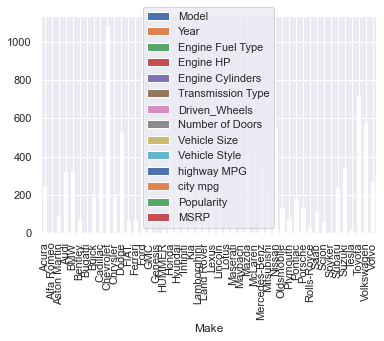

In [11]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
gb= df.groupby('Make').count()
gb.plot(kind='bar');


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

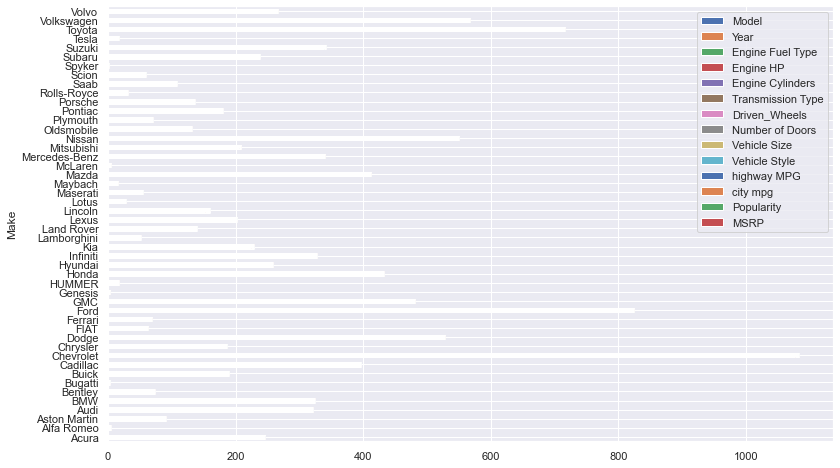

In [12]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

gb.plot.barh(figsize=(13,8));


### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


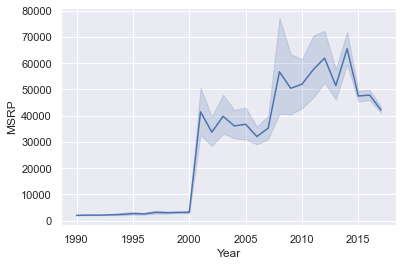

In [13]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

import seaborn as sns
sns.set()
#sns.set_theme(style="darkgrid")

ax = sns.lineplot(x='Year', y= 'MSRP', data=df);

#MSRP was quite low before 2000 and had a huge spike that year

# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.  
_Hint use `np.where()`_.

In [14]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.
import numpy as np
yr= df['Year']< 2000
df['early_fee']= np.where(yr, 10, 0)

df['adjusted_price']= np.where(yr, df['MSRP'] *df['early_fee'], df['MSRP'] +df['early_fee'])
df.head()




,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,early_fee,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,0,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,0,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,0,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,0,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,0,34500


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

(0.0, 100000.0)

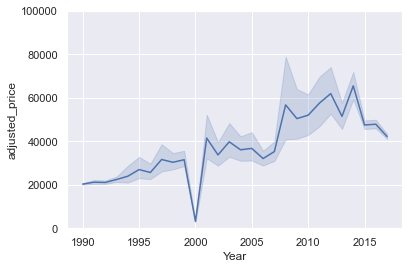

In [15]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000
sns.set()
ax = sns.lineplot(x='Year', y= 'adjusted_price', data=df);
#ax.set_yticks(ticks=[0,100000])
#ax.plot(ylim=(0,100000))
ax.set_ylim(bottom=0, top=100000)




# What car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. _Hint, you can use df.head(5) for this_.
* Use our `adjusted_price` column for this

In [14]:
# What top 5 car makers make the most expensive cars on average. 


df.sort_values(by=['adjusted_price'], inplace=True, ascending=False)
df.head(5)




,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,early_fee,adjusted_price
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,2065902,0,2065902
7444,Rolls-Royce,Park Ward,2002,premium unleaded (required),322.0,12.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,15,11,86,262990,0,262990
5776,Lamborghini,Huracan,2016,premium unleaded (required),610.0,10.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Convertible,20,14,1158,262350,0,262350
11095,Aston Martin,V12 Vanquish,2006,premium unleaded (required),520.0,12.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Coupe,16,10,259,260000,0,260000
7443,Rolls-Royce,Park Ward,2001,premium unleaded (required),322.0,12.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,15,11,86,259900,0,259900


# What are the top 5 car makers that have the highest median highway MPG?

In [18]:
# Which car makers have the highest median highway MPG?
df.sort_values(by=['highway MPG'], inplace=True, ascending=False)
df.head(1)




,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,early_fee,adjusted_price
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Midsize,Sedan,354,24,3105,51600,0,51600


# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

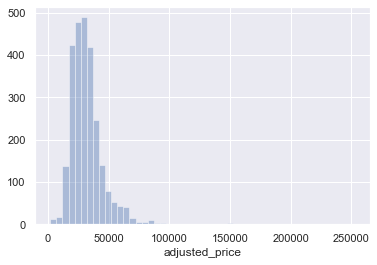

In [23]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
import seaborn as sns
chosen= ['Chevrolet', 'Ford', 'Toyota']
sns.set()
c1=df['Make'].isin(chosen)
x=df[c1].adjusted_price
sns.distplot(a=x, kde=False)




# Remake the same histogram, but limit the x-axis from 0 to 100,000

(0.0, 100000.0)

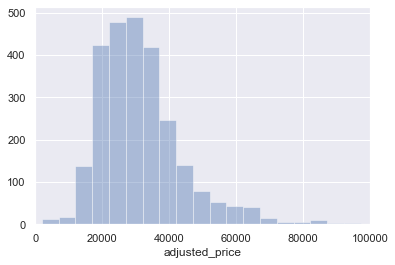

In [26]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
import seaborn as sns
chosen= ['Chevrolet', 'Ford', 'Toyota']
sns.set()
c1=df['Make'].isin(chosen)
x=df[c1].adjusted_price
ax= sns.distplot(a=x, kde=False)
ax.set_xlim(left=0, right=100000)


# Plot the relationship between Engine HP and highway MPG

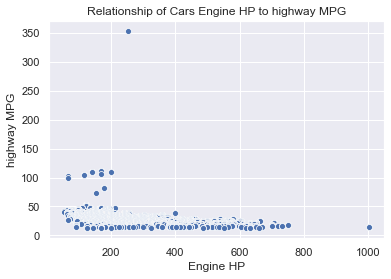

In [28]:
# Plot the relationship between Engine HP and highway MPG

sns.set()
ax = sns.scatterplot(data=df, x='Engine HP', y='highway MPG');

ax.set_title("Relationship of Cars Engine HP to highway MPG");



# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

In [48]:
# Remove any statisical outliers from Engine HP and highway MPG
# Create an empty list that we will store our new z-score column names in
z_score_cols = []

# Loop through the numerical columns
    
# Create a new column name that is the old column name + 'z_score'
new_col_name = 'Engine HP' + '_zscore'

# Call the zscore function on the numerical column in our dataframe
# And set it equal to our new column name.
df[new_col_name] = stats.stats.zscore(df['Engine HP'])
#print(stats.stats.zscore(df['Engine HP'].values))

new_col_name2 = 'highway MPG' + '_zscore'
df[new_col_name2] = stats.stats.zscore(df['highway MPG'])
# Convert all values into absolute values. 
df[new_col_name] = abs(df[new_col_name])
df[new_col_name2] = abs(df[new_col_name2])

# Append the new column name our our z_score_cols list for easier access for later.
z_score_cols.append(new_col_name)
z_score_cols.append(new_col_name2)

df.head()




,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Engine HP_zscore,highway MPG_zscore
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,0.782909,0.043119
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,0.462403,0.225580
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,0.462403,0.225580
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,0.178609,0.225580
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,0.178609,0.225580


# What does this plot tell you about how Engine HP affects highway MPG?

In [40]:
df['Engine HP'].isna().sum()


69

In [26]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('YOUR ANSWER HERE')

YOUR ANSWER HERE


# Using a pairplot, display all of the linear relationships.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

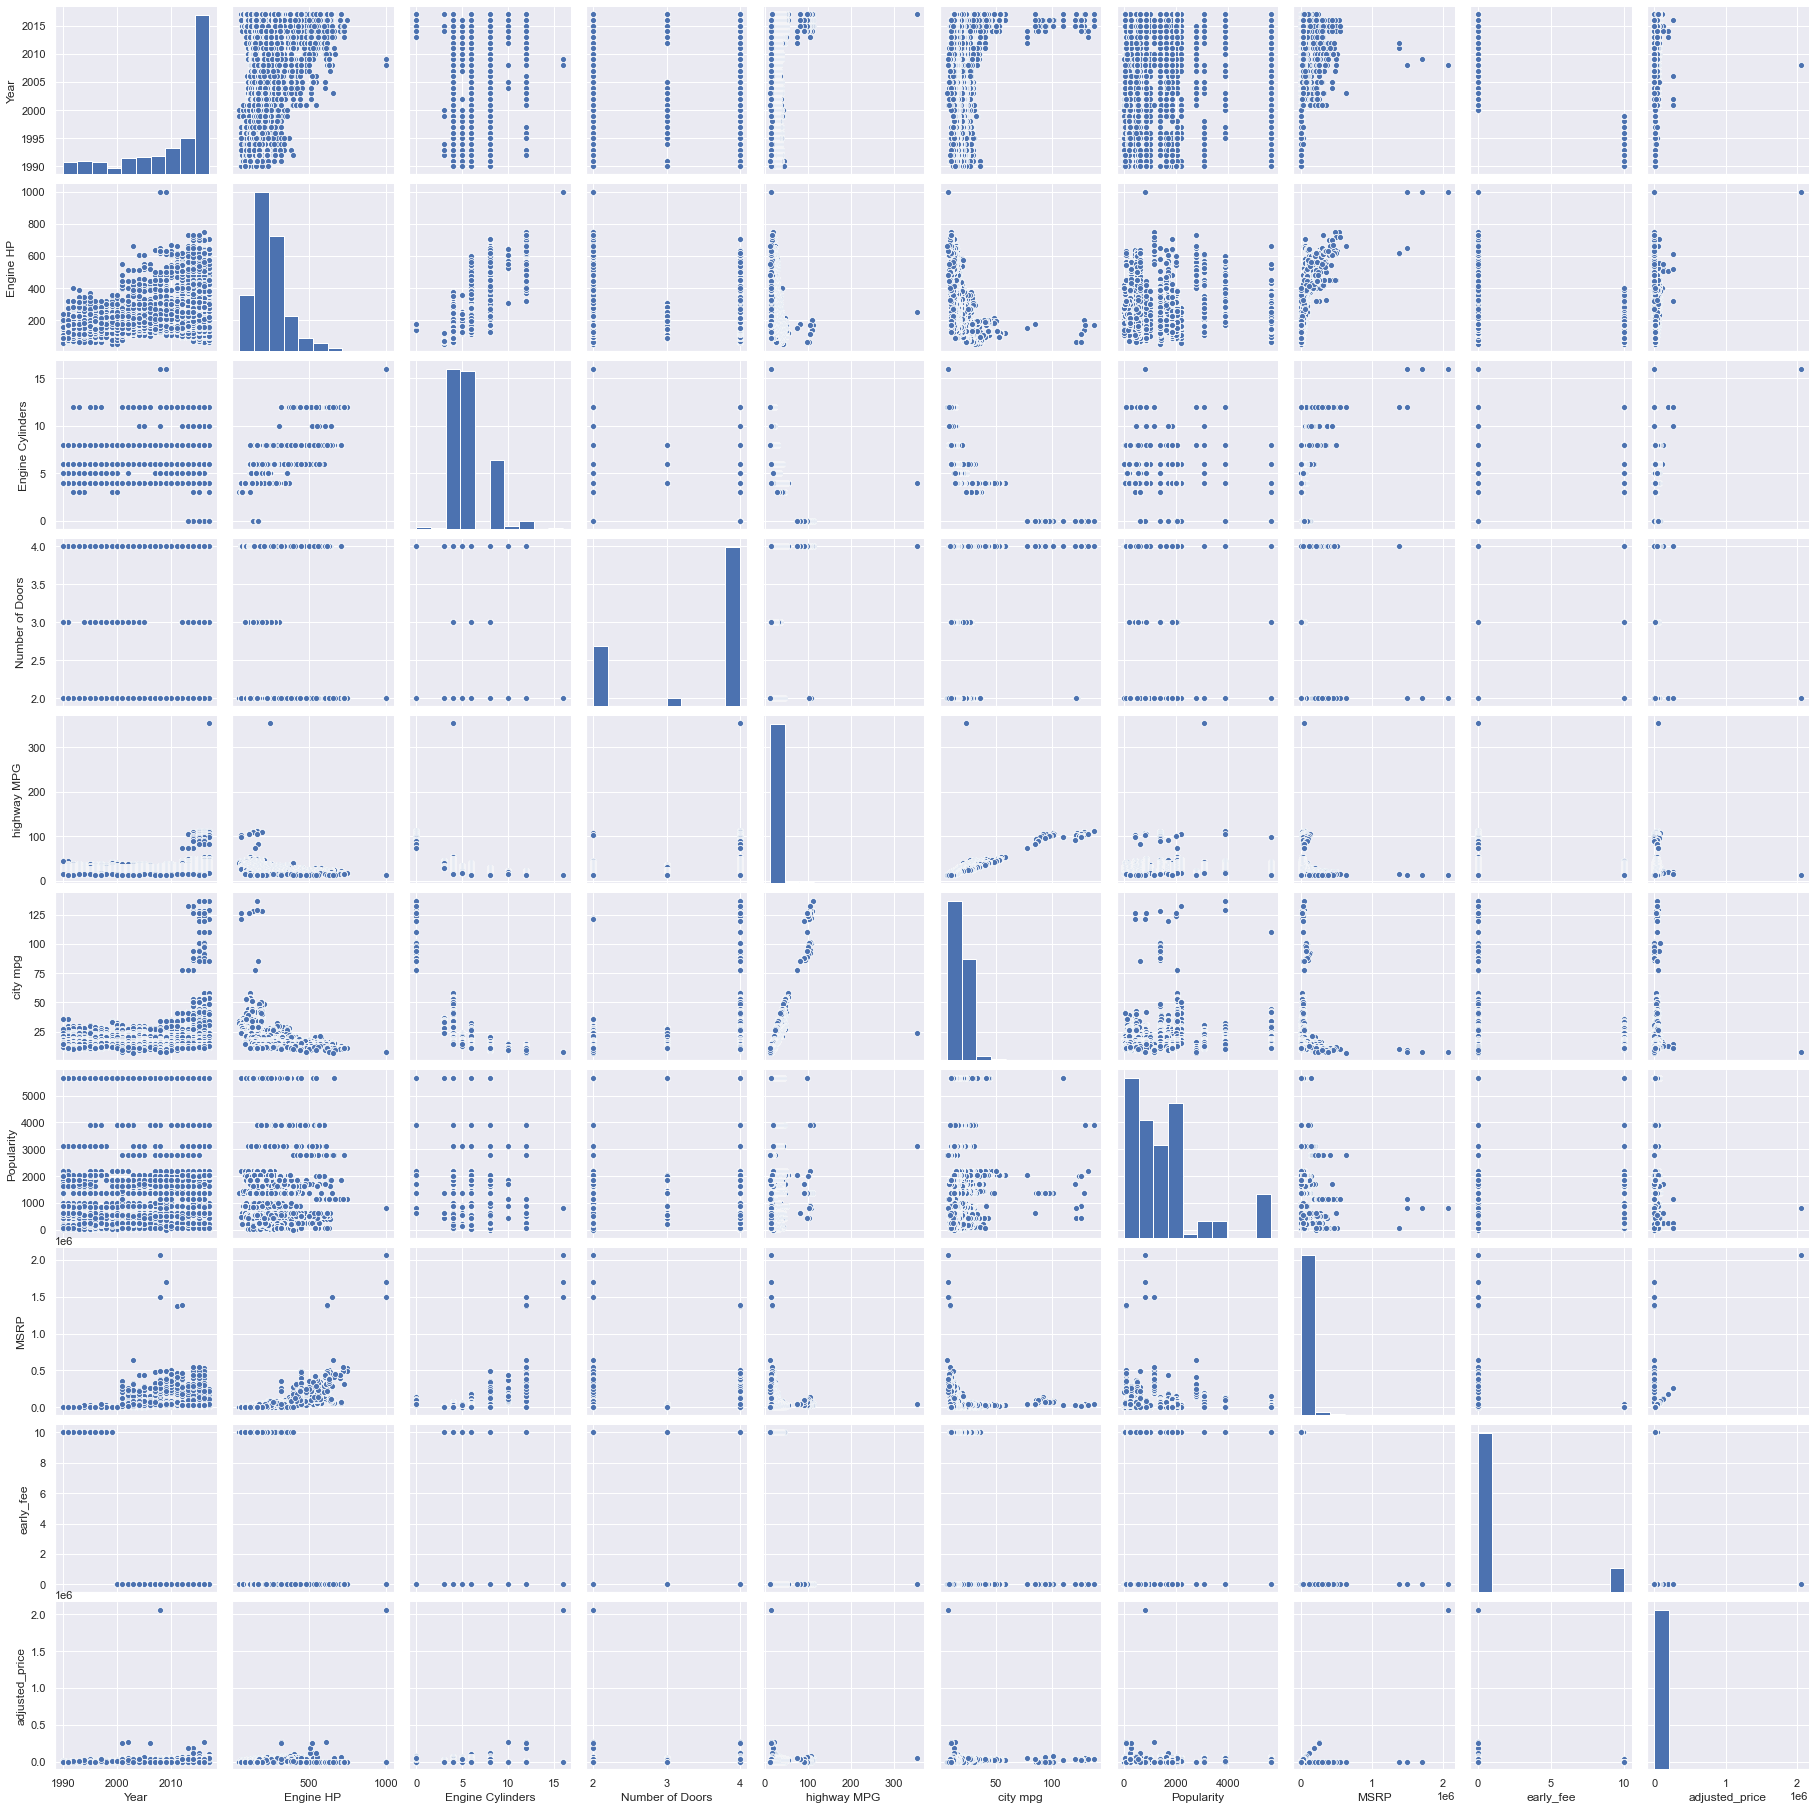

In [32]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df);




In [33]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('city MPG and highway MPG')



city MPG and highway MPG


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

Engine HP has the strongest relationship with Engine Cylinders


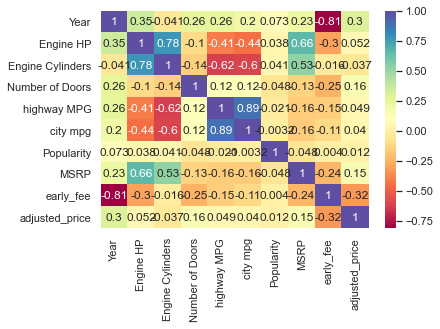

In [39]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
sns.heatmap(df.corr(), annot=True, cmap='Spectral')

print('Engine HP has the strongest relationship with Engine Cylinders')


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [30]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well




# Extra Credit part 2
Rebuild the charts you made but using the interactive plotting library, Plotly:  https://plotly.com/python/.  
* You may need to install plotly by running `pip install plotly` in your terminal. 